Semantic similarity
a) Using the output from Q2, identify semantically similar job ads and group them together.
(Extra points for using word embeddings)
(Extra points for utilizing job descriptions, job responsibilities data and/or others)

In [3]:
# Cleaning the texts
import pandas as pd
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd


Job = pd.read_csv("data job posts.csv" )


NJobre3 = []
for i in range(0, 19001):
    if pd.notnull(Job['JobRequirment'][i]):
        Jobre = re.sub('[^a-zA-Z]', ' ' , Job['JobRequirment'][i])
        Jobre = Jobre.lower()
        Jobre = Jobre.split()
        ps = PorterStemmer()
        Jobre = [ps.stem(word) for word in Jobre if not word in set(stopwords.words('english'))]
        Jobre = ' ' .join(Jobre)
    else : Jobre = "NOJOBREQ"
    NJobre3.append(Jobre)
    
NJobdes3 = []
for i in range(0, 19001):
    if pd.notnull(Job['JobDescription'][i]):
        Jobre = re.sub('[^a-zA-Z]', ' ' , Job['JobDescription'][i])
        Jobre = Jobre.lower()
        Jobre = Jobre.split()
        ps = PorterStemmer()
        Jobre = [ps.stem(word) for word in Jobre if not word in set(stopwords.words('english'))]
        Jobre = ' ' .join(Jobre)
    else : Jobre = "NOJOBDESC"
    NJobdes3.append(Jobre)


NJobQual3 = []
for i in range(0, 19001):
    if pd.notnull(Job['RequiredQual'][i]):
        Jobre = re.sub('[^a-zA-Z]', ' ' , Job['RequiredQual'][i])
        Jobre = Jobre.lower()
        Jobre = Jobre.split()
        ps = PorterStemmer()
        Jobre = [ps.stem(word) for word in Jobre if not word in set(stopwords.words('english'))]
        Jobre = ' ' .join(Jobre)
    else : Jobre = "NOJOBQUAL"
    NJobQual3.append(Jobre)
    
NJobTitle3 = []
for i in range(0, 19001):
    if pd.notnull(Job['Title'][i]):
        Jobre = re.sub('[^a-zA-Z]', ' ' , Job['Title'][i])
        Jobre = Jobre.lower()
        Jobre = Jobre.split()
        ps = PorterStemmer()
        Jobre = [ps.stem(word) for word in Jobre if not word in set(stopwords.words('english'))]
        Jobre = ' ' .join(Jobre)
    else : Jobre = "NOJOBTITLE"
    NJobTitle3.append(Jobre)


In [4]:
NJobtxt3 = []
for i in range(0, 19001):
    NJobtxt3.append(NJobre3[i] + ' ' + NJobdes3[i] + ' ' + NJobQual3[i] + ' ' + NJobTitle3[i])

In [5]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
JOBSM3 = cv.fit_transform(NJobtxt3).toarray()

In [6]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)
JOBSPCA3 = pca.fit_transform(JOBSM3)
explained_variance = pca.explained_variance_ratio_

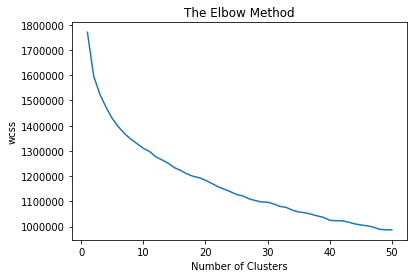

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,51):
  kmeans = KMeans(n_clusters=i , init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(JOBSPCA3)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,51), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(JOBSPCA3)

In [11]:
NJob = pd.read_csv("Njob.csv")
NJobClus = pd.concat([NJob, pd.DataFrame(data=y_kmeans, columns=["ClusterID"])], axis=1)
NJobClus.head()

,Unnamed: 0,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,...,pos_dur,pos_loc,job_desc,job_resp,req_quali,remu,appli_dead,about_com,New_Job_Req,ClusterID
0,0,AMERIA Investment Consulting Company\r\r\nJOB ...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,...,NO DURATION,"yerevan, armenia",ameria investment consulting company is seekin...,- supervises financial management and administ...,"to perform this job successfully, an\tindividu...",REMUNATION NOTDEF,26 january 2004\t-----------------------------...,ABOUT NOTDEF,supervis financi manag administr staff includ ...,13
1,1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,...,3 months,"irex armenia main office; yerevan, armenia",irex currently seeks to fill the position of a...,- presenting the cc program to interested part...,- bachelor's degree; master's is preferred;\t-...,commensurate with experience.,12 january 2004,the international research & exchanges board (...,NO JOB REQ,5
2,2,Caucasus Environmental NGO Network (CENN)\r\r\...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,...,renewable annual contract,"yerevan, armenia",public outreach and strengthening of a growing...,- working with the country director to provide...,"- degree in environmentally related field, or ...",salary commensurate with experience.,20 january 2004,the caucasus environmental ngo network is a\tn...,work countri director provid environment infor...,5
3,3,Manoff Group\r\r\nJOB TITLE: BCC Specialist\r...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,...,NO DURATION,"manila, philippines",the lead (local enhancement and development fo...,- identify gaps in knowledge and overseeing in...,"- advanced degree in public health, social sci...",REMUNATION NOTDEF,23 january 2004,ABOUT NOTDEF,identifi gap knowledg overse inform collect fi...,11
4,4,Yerevan Brandy Company\r\r\nJOB TITLE: Softwa...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,...,NO DURATION,"yerevan, armenia",NO DESCRIPTION,- rendering technical assistance to database m...,- university degree; economical background is ...,will be commensurate with the norms accepted i...,"20 january 2004, 18:00\t----------------------...",ABOUT NOTDEF,render technic assist databas manag system rea...,10
